<a href="https://colab.research.google.com/github/SolracArt23/Analisis-sentimientos-Tensorflowjs/blob/main/Red_neuronal_Pandas_y_Numpy_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Red Neuronal Numpy**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles


In [ ]:
ejemplos = 1000
gaus=make_gaussian_quantiles(mean=None, 
                        cov=0.1, 
                        n_samples=ejemplos, 
                        n_features= 2,
                        n_classes=2,
                        shuffle=True,
                        random_state= None
                        )

In [ ]:
x,y= gaus

In [ ]:
x.shape

(1000, 2)

In [ ]:
y = y.reshape(y.shape[-1],1)
y.shape

(1000, 1)

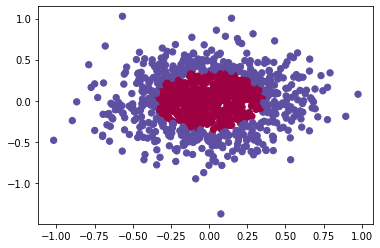

In [ ]:
plt.scatter(x[:,0],x[:,1], c=y[:,0], s=40, cmap=plt.cm.Spectral)

funcion de  activacion

In [ ]:
def Sigmoid(x,derivate=False):
  if derivate:
    return np.exp(-x)/((np.exp(-x)+1)**2)
  else:
    return 1/(1+np.exp(-x))

def Relu(x,deritvate=False):
  if deritvate:
    x[x<=0]=0
    x[x>0]=1
    return x
  else:
    return np.maximum(0,x)


funcion de perdida

In [ ]:
def mse(y,y_hat,derivate=False):
  if derivate:
    return (y_hat-y)
  else:
    return np.mean((y_hat-y)**2)

Estructra del model

In [ ]:

def input_parameters_deep(layers_dim):
  parameters={}
  l = len(layers_dim)
  #crear pesos aleatorios
  for L in range(0,l-1):
    parameters['W'+str(L+1)] =(np.random.rand(layers_dim[L],layers_dim[L+1])* 2)-1 #definir peso de -1 a 1
    parameters['b'+str(L+1)] =(np.random.rand(1,layers_dim[L+1])* 2)-1 #definir bias
  return parameters
  

In [ ]:
input_layer= 2#neurona de entrada 
output_layer=1#neurona de salida
layer_dims=[input_layer,4,8,output_layer]
params=input_parameters_deep(layer_dims)

In [ ]:
params['W1'].shape

(2, 4)

**producto punto** 
***
Recordemos que para realizar un producto punto es necesario que la fila del primer matriz (para este caso es el modelo) sea igual a la fila de la otra matriz.

*colocar imagen del producto punto*



```
#producto punto del pseo (2,4)
np.matmul(x,model['W1']).shape
# result: (1000,4)
```




In [ ]:
#confirmacion de producto punto
params['W1'].shape[0] == x.shape[-1]

True

**backpropagation**
***

In [ ]:
def backpropagation(modelo,layer_dim,y,lr:float):
  activations={'relu':Relu,'sigmoid':Sigmoid}#funciones de activacion
  L = len(layer_dim)-1
  #output layers
  while(L != 0):
    if L == len(layer_dim)-1:
      modelo['dz'+str(L)] = mse(y,modelo['A'+str(L)],True)*activations[modelo['AC'][L]](modelo['A'+str(L)],True)
    else:
      modelo['dz'+str(L)] =(modelo['dz'+str(L+1)] @ modelo['W'+str(L+1)].T)*activations[modelo['AC'][L]](modelo['A'+str(L)],True)
    modelo['dW'+str(L)] =modelo['A'+str(L-1)].T @ modelo['dz'+str(L)]
    
    L = L-1

  return Desenso_gradiante(modelo,lr,layer_dim)

def Desenso_gradiante(modelo,lr,layer_dim): 
    L = len(layer_dim)-1
    while(L != 0):
      modelo['W'+str(L)] = modelo['W'+str(L)] - modelo['dW'+str(L)] * lr
      modelo['b'+str(L)] = modelo['b'+str(L)] - (np.mean(modelo['dW'+str(L)],axis=0,keepdims=True)) * lr
      # print(f"{modelo['W'+str(L)]} = ({modelo['W'+str(L)]} - {modelo['dW'+str(L)]}) * {lr}")
      L = L-1
    return modelo


**Entrenar modelo**

In [ ]:
#forward
def Entrenamiento(Datos,modelo,layer_dim,lista_act:list,lr:float=0.001, trainig:bool=True):
  
    activations={'relu':Relu,'sigmoid':Sigmoid}#funciones de activacion
    modelo['A0'] = Datos
    L = len(layer_dim)
    for l in range(0,L-1):
      modelo['Z'+str(l+1)] =(modelo['A'+str(l)] @ modelo['W'+str(l+1)]) + modelo['b'+str(l+1)] #Regresion: x1*w1+b1
      modelo['A'+str(l+1)] = activations[lista_act[l]](modelo['Z'+str(l+1)])
    modelo['AC'] = lista_act
    if trainig == True:
      return backpropagation(modelo,layer_dim,y,lr)
    else:
      return modelo["A"+str(len(layer_dim)-1)]

    



In [ ]:
Modelo=Entrenamiento(x,params,layer_dims,['relu','relu','relu','sigmoid'],0.001)
Modelo.keys()

dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3', 'A0', 'Z1', 'A1', 'Z2', 'A2', 'Z3', 'A3', 'AC', 'dz3', 'dW3', 'dz2', 'dW2', 'dz1', 'dW1'])

Creacion de nuevo modelo

In [ ]:
layer_dim2=[2,4,9,1]
params_2 = input_parameters_deep(layer_dim2)
error=[]
output=[]

output = Entrenamiento(x,params_2,layer_dim2,['relu','relu','relu','sigmoid'],0.02)
for _ in range(80000):
  output = Entrenamiento(x,output,layer_dim2,['relu','relu','relu','sigmoid'],0.001)
  if _ % 20 == 0:
    print(mse(y,output['A3']))
    error.append(mse(y,output['A3']))

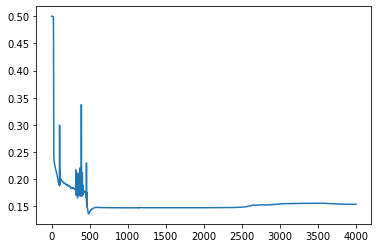

In [ ]:
plt.plot(error)

**Data de prueba**
***

In [ ]:
data_test=(np.random.rand(1000,2)*2)-1
prediccion = []

In [ ]:
#entrenar datos de prediccion

prediccion=Entrenamiento(data_test,output,layer_dim2,output['AC'],trainig=False)


In [ ]:
prediccion = np.where(prediccion >=0.5,1,0)
prediccion[:5]

array([[1],
       [0],
       [1],
       [1],
       [1]])

Text(0.5, 1.0, 'data de prueba')

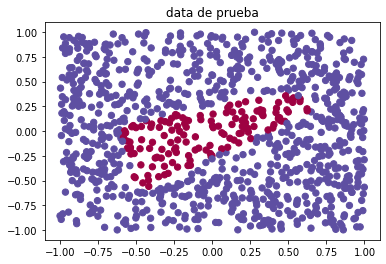

In [ ]:
plt.scatter(data_test[:,0],data_test[:,1], c=prediccion[:,0], s=40, cmap=plt.cm.Spectral)
plt.title("data de prueba")